In [39]:
from google.colab import drive 
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/Colab Notebooks/senal_ECG_1.txt' 'senal_ECG_1.txt'
!cp '/content/gdrive/My Drive/Colab Notebooks/senal_ECG_2.txt' 'senal_ECG_2.txt'
!cp '/content/gdrive/My Drive/Colab Notebooks/senal_real_ECG_1.txt' 'senal_real_ECG_1.txt'
!cp '/content/gdrive/My Drive/Colab Notebooks/senal_real_ECG_2.txt' 'senal_real_ECG_2.txt'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import matplotlib
import numpy as np
import matplotlib.pylab as plt
from scipy.io import wavfile
import cmath as cm
%matplotlib inline

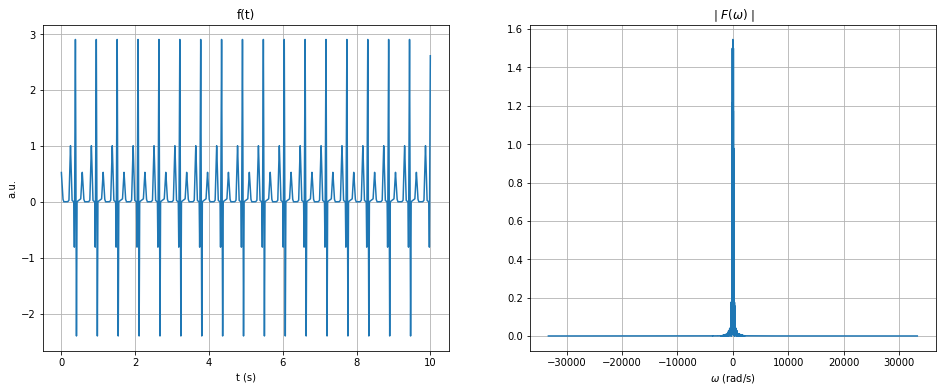

In [41]:
#1.Grafique las señales sintéticas y sus respectivas transformadas de Fourier. Tenga en cuenta que las señales ECG se simularon para un tiempo total de 10 segundos
ft = np.loadtxt('senal_ECG_1.txt', delimiter = ' ', unpack = True)
dt = 10/ft.size
t = np.arange(0,10,dt)
fig3 = plt.figure(figsize=(16,6))

ax1 = plt.subplot(1,2,1)
ax1.plot(t,ft)
plt.title('f(t)')
plt.grid()
plt.xlabel('t (s)')
plt.ylabel('a.u.')

fw = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft))*dt)
w = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))
w = 2*np.pi*np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))

ax2 = plt.subplot(1,2,2)
ax2.plot(w,abs(fw))
plt.title('$\mid F(\omega) \mid$')
plt.xlabel('$\omega$ (rad/s)')
plt.grid()

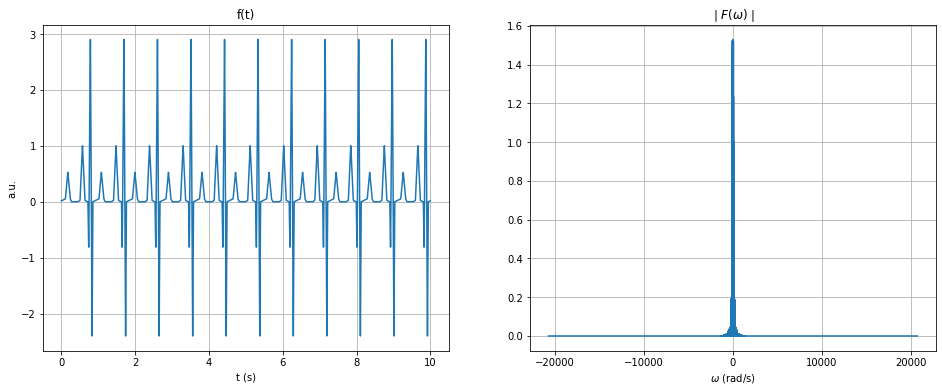

In [42]:
ft = np.loadtxt('senal_ECG_2.txt', delimiter = ' ', unpack = True)
dt = 10/ft.size
t = np.arange(0,10,dt)
fig3 = plt.figure(figsize=(16,6))


ax1 = plt.subplot(1,2,1)
ax1.plot(t,ft)
plt.title('f(t)')
plt.grid()
plt.xlabel('t (s)')
plt.ylabel('a.u.')

fw = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft))*dt)
w = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))
w = 2*np.pi*np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))

ax2 = plt.subplot(1,2,2)
ax2.plot(w,abs(fw))
plt.title('$\mid F(\omega) \mid$')
plt.xlabel('$\omega$ (rad/s)')
plt.grid()

Text(0.5, 0, 'Frecuencia (Hz)')

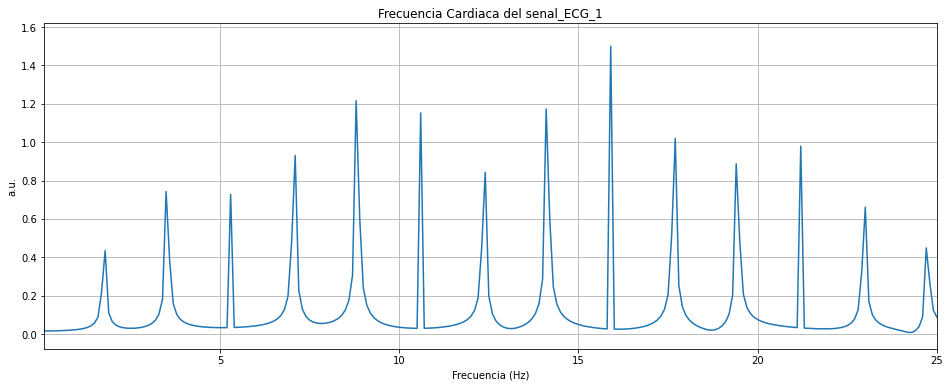

In [43]:
#2. A partir de las gráficas de las señales y sus transformadas de Fourier identifique la frecuencia cardíaca de cada paciente (igual que con el piano, la frecuencia que buscamos es la fundamental, pero en este caso no podemos confundirla con la señal cercana a cero que para este ejemplo es ruido).

ft = np.loadtxt('senal_ECG_1.txt', delimiter = ' ', unpack = True)
dt = 10/ft.size
t = np.arange(0,10,dt)
fig3 = plt.figure(figsize=(16,6))

dataft = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft)))*dt
freq = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))


plt.plot(freq,abs(dataft))
plt.title('Frecuencia Cardiaca del senal_ECG_1')
plt.xlim(0.1,25)
plt.ylabel('a.u.')
plt.grid()
plt.xlabel('Frecuencia (Hz)')

Text(0.5, 0, 'Frecuencia (Hz)')

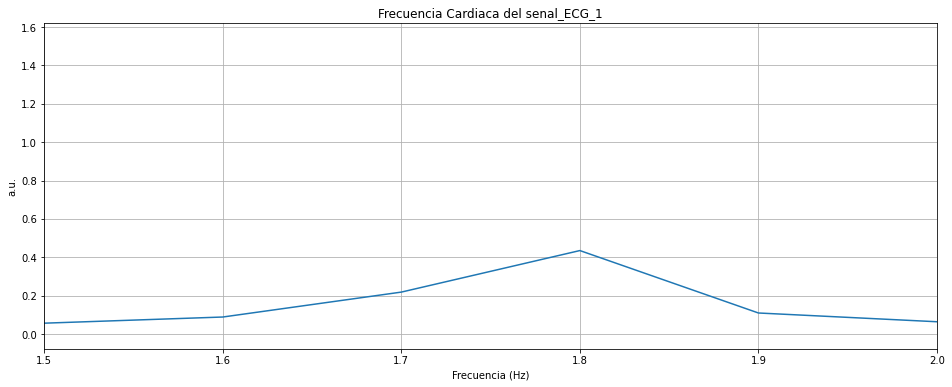

In [44]:
#haciendole un zoom al primer pico que tenemos de nuestra gráfica anterior

ft = np.loadtxt('senal_ECG_1.txt', delimiter = ' ', unpack = True)
dt = 10/ft.size
t = np.arange(0,10,dt)
fig3 = plt.figure(figsize=(16,6))

dataft = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft)))*dt
freq = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))


plt.plot(freq,abs(dataft))
plt.title('Frecuencia Cardiaca del senal_ECG_1')
plt.xlim(1.5,2)
plt.ylabel('a.u.')
plt.grid()
plt.xlabel('Frecuencia (Hz)')

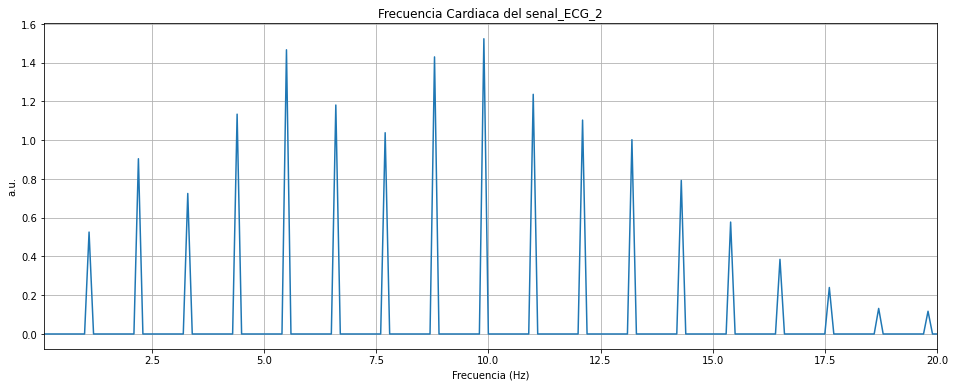

In [45]:
ft = np.loadtxt('senal_ECG_2.txt', delimiter = ' ', unpack = True)
dt = 10/ft.size
t = np.arange(0,10,dt)
fig3 = plt.figure(figsize=(16,6))

dataft = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft)))*dt
freq = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))

plt.plot(freq,abs(dataft))
plt.title('Frecuencia Cardiaca del senal_ECG_2')
plt.xlim(0.1,20)
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.grid()

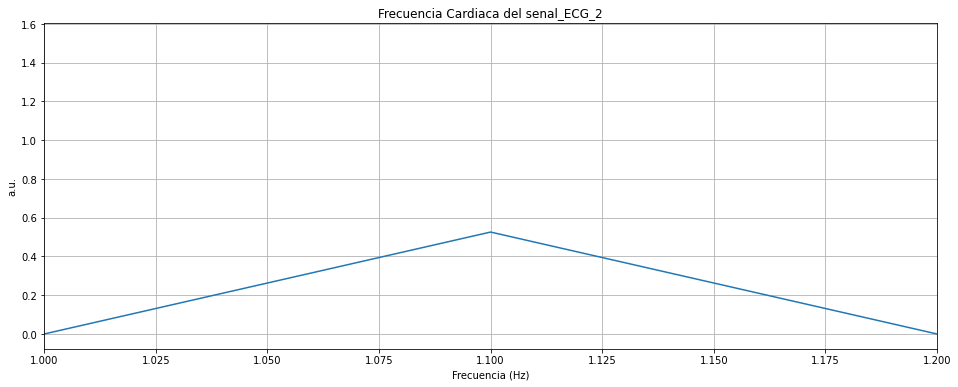

In [46]:
#haciendole un zoom al primer pico que tenemos de nuestra gráfica anterior
ft = np.loadtxt('senal_ECG_2.txt', delimiter = ' ', unpack = True)
dt = 10/ft.size
t = np.arange(0,10,dt)
fig3 = plt.figure(figsize=(16,6))

dataft = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft)))*dt
freq = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))

plt.plot(freq,abs(dataft))
plt.title('Frecuencia Cardiaca del senal_ECG_2')
plt.xlim(1,1.2)
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.grid()

**3. De acuerdo con sus respuestas, ¿los pacientes tienen un ritmo cardíaco normal o presentan patologías como taquicardia o bradicardia? Investigue.**

Vamos a necesitar la siguiente conversión: $1Hz = 60lpm$ \
 donde $lpm$ son latidos por minuto, se hace una regla de 3 y obtenemos los latidos de los pacientes.

El Paciente de senal_ECG_1 tiene: frecuencia cardiaca de 1.8Hz eso equivale a 108$lpm$, significa que el paciente tiene Taquicardia ó es un niño entre 0 a 9 años de edad____fuente:https://medlineplus.gov/spanish/ency/article/003399.htm y https://www.medtronic.com/es-es/tu-salud/patologias/pulso-acelerado.html
\
El Paciente de senal_ECG_2 tiene: frecuencia cardiaca de 1.1Hz eso equivale a 66$lpm$, significa que el paciente tiene un pulso normal (al menos el adecuado según mi fuente)____fuente:https://medlineplus.gov/spanish/ency/article/003399.htm

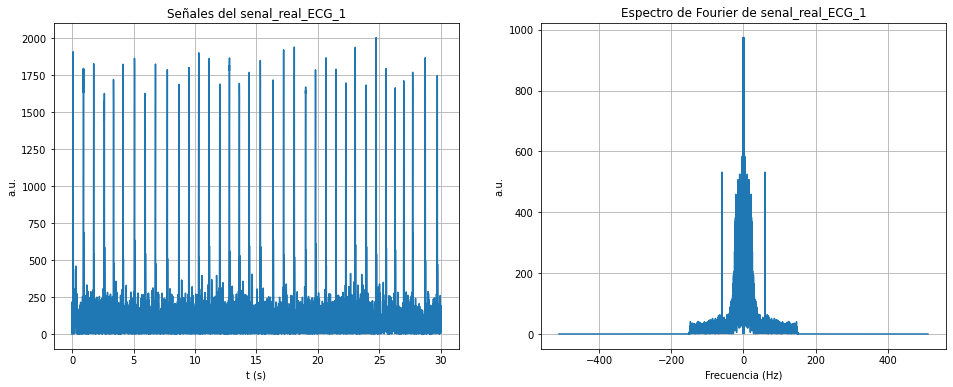

In [47]:
#4. Grafique las señales ECG reales y sus espectros de Fourier. Nota: las señales se midieron con un equipo cuya frecuencia de muestreo fue de 1024 Hz.
ft = np.loadtxt('senal_real_ECG_1.txt', delimiter = ' ', unpack = True)
dt = 1/1024
factor = 1/dt
t = np.arange(0,dt*ft.size,dt)
fig3 = plt.figure(figsize=(16,6))

fv = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft)))*dt
freq = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))

ft2 = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(fv)))*factor

plt.subplot(1,2,1)
plt.plot(t,abs(ft2))
plt.title('Señales del senal_real_ECG_1')
plt.ylabel('a.u.')
plt.xlabel('t (s)')
plt.grid()

plt.subplot(1,2,2)
plt.plot(freq,abs(fv))
plt.title('Espectro de Fourier de senal_real_ECG_1')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.grid()

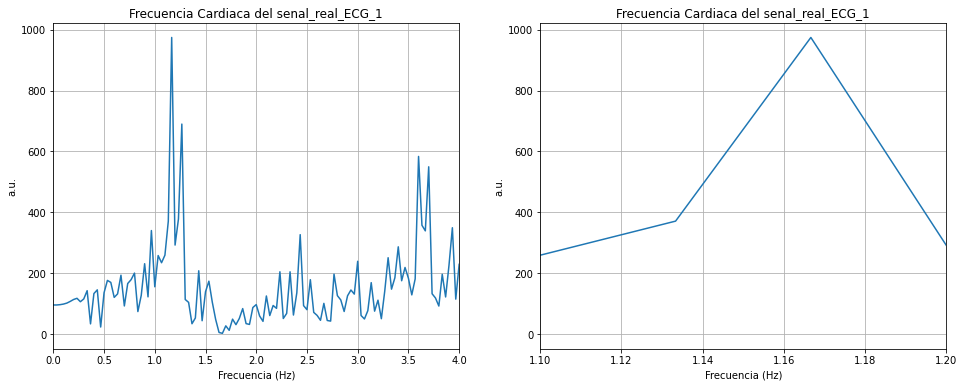

In [48]:
#Haciendo un zoom para tener mejor vizualición de la frecuencia
ft = np.loadtxt('senal_real_ECG_1.txt', delimiter = ' ', unpack = True)
dt = 1/1024
t = np.arange(0,dt*ft.size,dt)
fig3 = plt.figure(figsize=(16,6))

fv = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft)))*dt
freq = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))

plt.subplot(1,2,1)
plt.plot(freq,abs(fv))
plt.title('Frecuencia Cardiaca del senal_real_ECG_1')
plt.xlim(0,4)
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.grid()

plt.subplot(1,2,2)
plt.plot(freq,abs(fv))
plt.title('Frecuencia Cardiaca del senal_real_ECG_1')
plt.xlim(1.1,1.2)
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.grid()

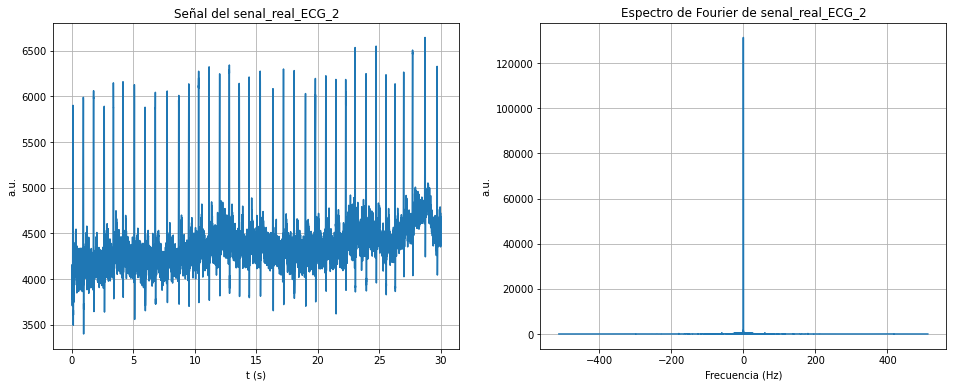

In [49]:
#Note que la TF de senal_real_ECG_2 aparenta ser nula. Lo que pasa es que el valor promedio, o lo que es lo mismo, la señal de frecuencia cero tiene un valor muy grande (note que oscila alrededor de 4000). Esto es un bias y debemos eliminarlo para poder ver la señal. En la señal original averigüe el valor promedio y résteselo a todos los datos de la señal original. Vuelva a hacer la TF y mire la diferencia. Tenga en cuenta que con este procedimiento no se logra eliminar completamente el ruido. Para que sea una persona viva es de esperarse al menos un pulso superior a 0.5 Hz.
ft = np.loadtxt('senal_real_ECG_2.txt', delimiter = ' ', unpack = True)
dt = 1/1024
factor = 1/dt
t = np.arange(0,dt*ft.size,dt)
fig3 = plt.figure(figsize=(16,6))

fv = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft)))*dt
freq = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))

ft2 = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(fv)))*factor

plt.subplot(1,2,1)
plt.plot(t,abs(ft2))
plt.title('Señal del senal_real_ECG_2')
plt.ylabel('a.u.')
plt.xlabel('t (s)')
plt.grid()

plt.subplot(1,2,2)
plt.plot(freq,abs(fv))
plt.title('Espectro de Fourier de senal_real_ECG_2')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.grid()

In [0]:
#Arreglando el bias
ft = np.loadtxt('senal_real_ECG_2.txt', delimiter = ' ', unpack = True)
prom = np.mean(ft)

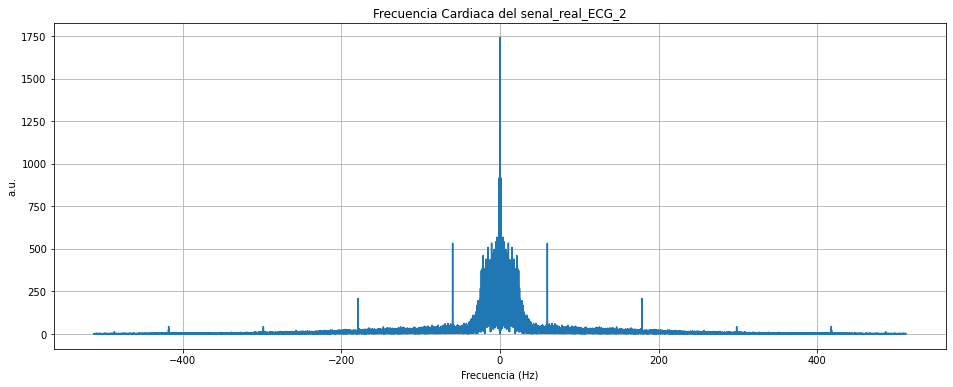

In [51]:
ft_nuevo = ft - prom

dt = 1/1024
t = np.arange(0,dt*ft_nuevo.size,dt)
fig3 = plt.figure(figsize=(16,6))

fv = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft_nuevo)))*dt
freq = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))

plt.plot(freq,abs(fv))
plt.title('Frecuencia Cardiaca del senal_real_ECG_2')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.grid()

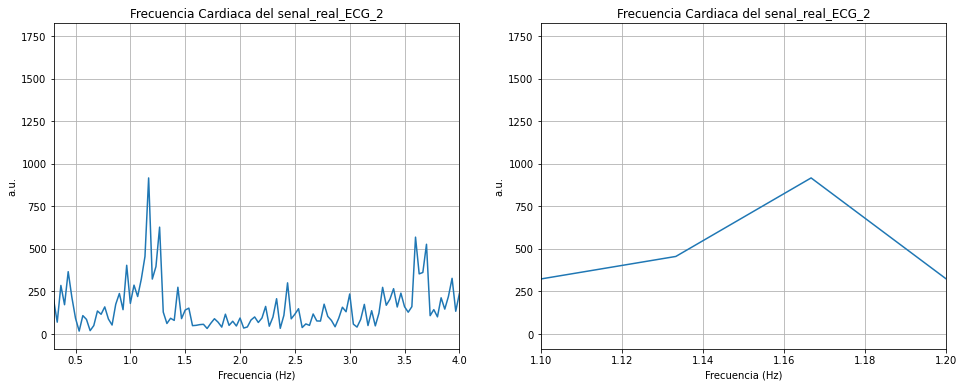

In [52]:
#Haciendo un zoom para tener mejor vizualición de la frecuencia
dt = 1/1024
t = np.arange(0,dt*ft_nuevo.size,dt)
fig3 = plt.figure(figsize=(16,6))

fv = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft_nuevo)))*dt
freq = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))

plt.subplot(1,2,1)
plt.plot(freq,abs(fv))
plt.title('Frecuencia Cardiaca del senal_real_ECG_2')
plt.xlim(0.3,4)
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.grid()

plt.subplot(1,2,2)
plt.plot(freq,abs(fv))
plt.title('Frecuencia Cardiaca del senal_real_ECG_2')
plt.xlim(1.1,1.2)
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.grid()

**5.Con base en los análisis anteriores, identifique la frecuencia cardíaca y determine si la señal ECG tomada en un paciente real corresponde a un paciente sano o no.**

Utilizamos la misma conversión: $1Hz = 60lpm$
\
Para el paciente de senal_real_ECG_1 vemos que tiene una frecuencia de 1.16Hz (aproximadamente) esto significa que tiene 105$lpm$ el paciente presenta irregularidad en su corazón o es un niño entre los 0 a 9 años (al menos según la fuente que tengo)
\
Para el paciente de senal_real_ECG_2 vemos que tiene una frecuencia de 1.16Hz (aproximadamente) esto significa que tiene 105$lpm$ el paciente presenta irregularidad en su corazón o es un niño entre los 0 a 9 años (al menos según la fuente que tengo)

Fuente: https://medlineplus.gov/spanish/ency/article/003399.htm

6.¿Cuál es la frecuencia cardíaca? ¿De las dos señales reales, puede identificar la que tuvo un tratamiento digital previo? Justifique.

La que se nota que tuvo un previo tratamiento digital es: **senal_real_ECG_1**
\
Sabemos que las señales reales tienen la misma frecuencia cardiaca, Me atreveria a decir que es la misma persona. Veamos las gráficas de la TF de señal real 1 y la señal real 2 (sin hacer la correción del bias)

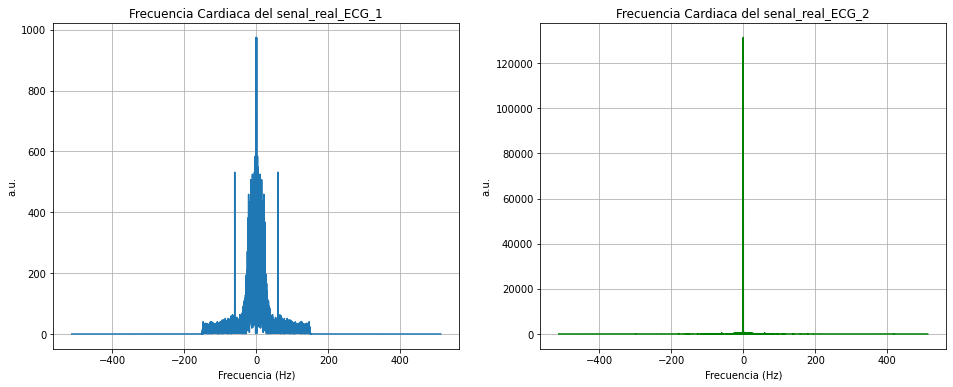

In [53]:
ft = np.loadtxt('senal_real_ECG_1.txt', delimiter = ' ', unpack = True)
ft2 = np.loadtxt('senal_real_ECG_2.txt', delimiter = ' ', unpack = True)
dt2 = dt = 1/1024
t = np.arange(0,dt*ft.size,dt)
t2 = np.arange(0,dt*ft2.size,dt2)
fig3 = plt.figure(figsize=(16,6))

fv = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft)))*dt
freq = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))

fv2 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft2)))*dt2
freq2 = np.arange(-1/(2*dt2),1/(2*dt2),1/(dt2*t2.size))

plt.subplot(1,2,1)
plt.plot(freq,abs(fv))
plt.title('Frecuencia Cardiaca del senal_real_ECG_1')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.grid()

plt.subplot(1,2,2)
plt.plot(freq2,abs(fv2), color = 'g')
plt.title('Frecuencia Cardiaca del senal_real_ECG_2')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.grid()

Como vemos en las gráficas anteriores, vemos que la señal 1 tiene mejor visualización de de la frecuencia que la señal 2. ahora hacemos el tratamiento de la señal 2 a la señal 1, pero en ves de restar vamos a sumarle el promedio.

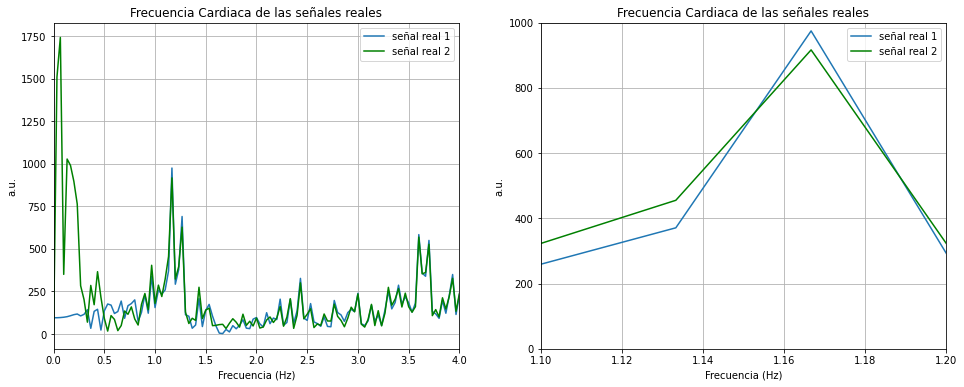

In [54]:
ft = np.loadtxt('senal_real_ECG_1.txt', delimiter = ' ', unpack = True)
ft2 = np.loadtxt('senal_real_ECG_2.txt', delimiter = ' ', unpack = True)
dt2 = dt = 1/1024
t = np.arange(0,dt*ft.size,dt)
t2 = np.arange(0,dt*ft_nuevo.size,dt2)
fig3 = plt.figure(figsize=(16,6))

fv = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft)))*dt
freq = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))

fv2 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft_nuevo)))*dt2
freq2 = np.arange(-1/(2*dt2),1/(2*dt2),1/(dt2*t2.size))

plt.subplot(1,2,1)
plt.plot(freq,abs(fv), label = 'señal real 1')
plt.plot(freq2,abs(fv2), color = 'g', label = 'señal real 2')
plt.title('Frecuencia Cardiaca de las señales reales')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0,4)
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(freq,abs(fv), label = 'señal real 1')
plt.plot(freq2,abs(fv2), color = 'g', label = 'señal real 2')
plt.title('Frecuencia Cardiaca de las señales reales')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(1.1,1.2)
plt.ylim(0,1000)
plt.legend()
plt.grid()

Con la grafica anterior se muestra que la señales tienden a llegar a lo mismo (obviamente que la señal 1 debe de tener un tratamiento digital mucho más sofisticado)

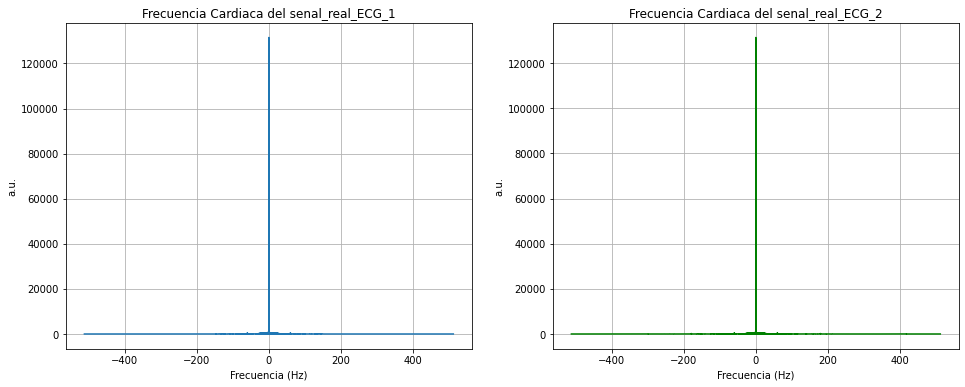

In [57]:
ft = np.loadtxt('senal_real_ECG_1.txt', delimiter = ' ', unpack = True)
ft2 = np.loadtxt('senal_real_ECG_2.txt', delimiter = ' ', unpack = True)
prom = np.mean(ft2)
ft_nuevo = ft + prom
dt2 = dt = 1/1024

t = np.arange(0,dt*ft.size,dt)
t2 = np.arange(0,dt*ft_nuevo.size,dt2)
fig3 = plt.figure(figsize=(16,6))

fv = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft_nuevo)))*dt
freq = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t2.size))

fv2 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft2)))*dt2
freq2 = np.arange(-1/(2*dt2),1/(2*dt2),1/(dt2*t.size))

plt.subplot(1,2,1)
plt.plot(freq,abs(fv))
plt.title('Frecuencia Cardiaca del senal_real_ECG_1')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.grid()

plt.subplot(1,2,2)
plt.plot(freq2,abs(fv2), color = 'g')
plt.title('Frecuencia Cardiaca del senal_real_ECG_2')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.grid()

Y con esto se demuestra que que la senal_real_ECG_1 y senal_real_ECG_2 son el mismo paciente...pero la senal_real_ECG_1 ya tenia la correción del bias incluida.